<a href="https://colab.research.google.com/github/odyssey33/playground/blob/master/numerical_method_extra_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
diff = lambda y, t: 2*y -3*t

def euler(y, t, h):
  ans = []
  for i in range(len(t)):
    if i == 0:
      ans.append(y+diff(y, t[i])*h)
    else:
      ans.append(ans[i-1]+diff(ans[i-1],t[i])*h)

  return ans

euler(1, np.linspace(0,1,11), 0.1)

[1.2,
 1.41,
 1.632,
 1.8683999999999998,
 2.12208,
 2.396496,
 2.6957952,
 3.02495424,
 3.389945088,
 3.7979341056000004,
 4.257520926720001]

In [0]:
def trapezoid(y, t, h):
  ans = []
  t2 = np.hstack((t, t[-1]+h))
  for i in range(len(t)):
    if i == 0:
      ans.append(y+ (diff(y, t[i])+ diff(y+h*diff(y, t[i]), t2[i+1]))*h/2)
    else:
      ans.append(ans[i-1]+ (diff(ans[i-1], t[i])+ diff(ans[i-1]+h*diff(ans[i-1], t[i]), t2[i+1]))*h/2)

  return ans

trapezoid(1, np.linspace(0,1,11), 0.1)

[1.205,
 1.4221000000000001,
 1.6539620000000002,
 1.9038336400000002,
 2.1756770408,
 2.474325989776,
 2.80567770752672,
 3.1769268031825986,
 3.5968506998827703,
 4.07615785385698,
 4.627912581705516]

In [0]:
def runge(y, t, h):
  ans=[]

  for i in range(len(t)):
    if i == 0:
      k1 = diff(y, t[i])
      k2 = diff(y+h/2*k1, t[i]+h/2)
      k3 = diff(y+h/2*k2, t[i]+h/2)
      k4 = diff(y+h*k3, t[i]+h)
      ans.append(y + (k1+2*k2+2*k3+k4)/6*h)
    else:
      k1 = diff(ans[i-1], t[i])
      k2 = diff(ans[i-1]+h/2*k1, t[i]+h/2)
      k3 = diff(ans[i-1]+h/2*k2, t[i]+h/2)
      k4 = diff(ans[i-1]+h*k3, t[i]+h)
      ans.append(ans[i-1]+ (k1+2*k2+2*k3+k4)/6*h)
  return ans

runge(1, np.linspace(0,1,11), 0.1)

[1.2053500000000001,
 1.4229544900000002,
 1.6555266140860003,
 1.906380206444641,
 2.1795627841514844,
 2.480017984562623,
 2.813783966344788,
 3.188235736493524,
 3.6123811285531904,
 4.097222310414867,
 4.656197329940718]

,Euler,Trapezoid,Runge,Exact,error_euler,error_trapezoid,error_runge
0,1.222222,1.228395,1.228878,1.000000,-0.222222,-0.228395,-0.228878
1,1.456790,1.472032,1.473236,1.228879,-0.227911,-0.243153,-0.244357
2,1.706447,1.734673,1.736928,1.473239,-0.233208,-0.261434,-0.263689
3,1.974547,2.021012,2.024764,1.736934,-0.237613,-0.284079,-0.287830
4,2.265187,2.336900,2.342752,2.024773,-0.240414,-0.312127,-0.317979
5,2.583376,2.689633,2.698396,2.342766,-0.240610,-0.346866,-0.355629
6,2.935238,3.088307,3.101065,2.698417,-0.236821,-0.389891,-0.402648
7,3.328253,3.544268,3.562462,3.101096,-0.227157,-0.443172,-0.461366
8,3.771569,4.071659,4.097202,3.562507,-0.209062,-0.509153,-0.534695
9,4.276362,4.688119,4.723534,4.097264,-0.179098,-0.590855,-0.626270


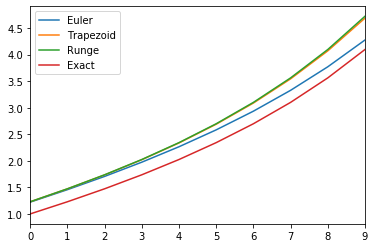

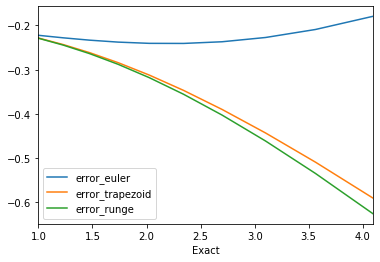

In [0]:
yi = 1

ti = 0
tf = 1
tn = 10

t = np.linspace(ti, tf, tn)

df_euler = euler(yi, t, t[1]-t[0])
df_trape = trapezoid(yi, t, t[1]-t[0])
df_runge = runge(yi, t, t[1]-t[0])
df_exact = (1/4*np.exp(2*t)+3/2*t+3/4)

df = pd.DataFrame([df_euler, df_trape, df_runge, df_exact], index=['Euler', 'Trapezoid', 'Runge', 'Exact']).T

df.plot()

df['error_euler'] = df['Exact']-df['Euler']
df['error_trapezoid'] = df['Exact']-df['Trapezoid']
df['error_runge'] = df['Exact']-df['Runge']

df.plot(x='Exact',y=['error_euler', 'error_trapezoid','error_runge'])

#plt.plot(df['Euler'], 'b')
#plt.plot(df['Trapezoid'], 'g')
#plt.plot(df['Runge'], 'y')
#plt.plot(df['Exact'], 'r')

#plt.show()

df

In a short period, Euler method seems to work well.

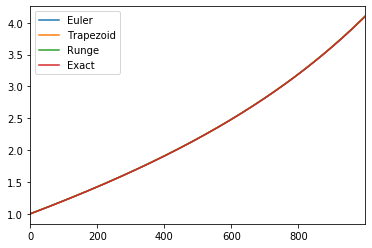

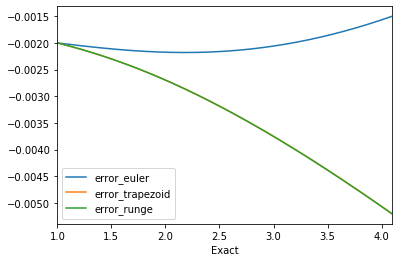

In [0]:
ti = 0
tf = 1
tn = 1000
t = np.linspace(ti, tf, tn)

df_euler = euler(yi, t, t[1]-t[0])
df_trape = trapezoid(yi, t, t[1]-t[0])
df_runge = runge(yi, t, t[1]-t[0])
df_exact = (1/4*np.exp(2*t)+3/2*t+3/4)


df = pd.DataFrame([df_euler, df_trape, df_runge, df_exact], index=['Euler', 'Trapezoid', 'Runge', 'Exact']).T

df.plot()

df['error_euler'] = df['Exact']-df['Euler']
df['error_trapezoid'] = df['Exact']-df['Trapezoid']
df['error_runge'] = df['Exact']-df['Runge']

df.plot(x='Exact',y=['error_euler', 'error_trapezoid','error_runge'])

For many steps, Trapezoid and Runge methods are fitting well to the exact function. 
However, Euler method still seems to be quite stable.

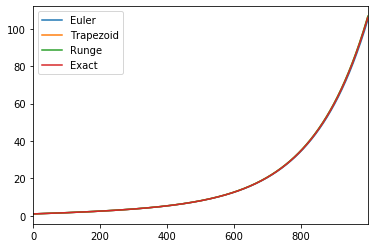

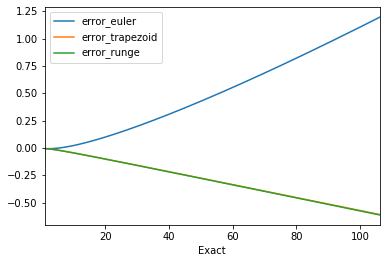

In [0]:
ti = 0
tf = 3
tn = 1000
t = np.linspace(ti, tf, tn)

df_euler = euler(yi, t, t[1]-t[0])
df_trape = trapezoid(yi, t, t[1]-t[0])
df_runge = runge(yi, t, t[1]-t[0])
df_exact = (1/4*np.exp(2*t)+3/2*t+3/4)


df = pd.DataFrame([df_euler, df_trape, df_runge, df_exact], index=['Euler', 'Trapezoid', 'Runge', 'Exact']).T

df.plot()

df['error_euler'] = df['Exact']-df['Euler']
df['error_trapezoid'] = df['Exact']-df['Trapezoid']
df['error_runge'] = df['Exact']-df['Runge']

df.plot(x='Exact',y=['error_euler', 'error_trapezoid','error_runge'])

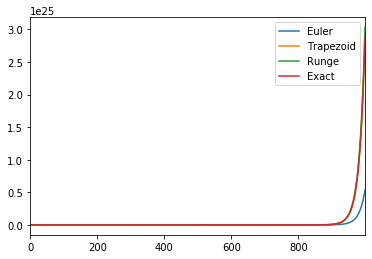

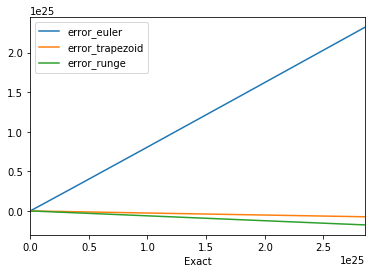

In [0]:
ti = 0
tf = 30
tn = 1000
t = np.linspace(ti, tf, tn)

df_euler = euler(yi, t, t[1]-t[0])
df_trape = trapezoid(yi, t, t[1]-t[0])
df_runge = runge(yi, t, t[1]-t[0])
df_exact = (1/4*np.exp(2*t)+3/2*t+3/4)


df = pd.DataFrame([df_euler, df_trape, df_runge, df_exact], index=['Euler', 'Trapezoid', 'Runge', 'Exact']).T

df.plot()

df['error_euler'] = df['Exact']-df['Euler']
df['error_trapezoid'] = df['Exact']-df['Trapezoid']
df['error_runge'] = df['Exact']-df['Runge']

df.plot(x='Exact',y=['error_euler', 'error_trapezoid','error_runge'])

However, as the period increase, Euler method doesn't work well. Unlike Trapezoid and Runge methods, its error rate suddently soars.

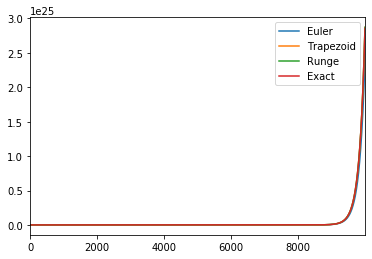

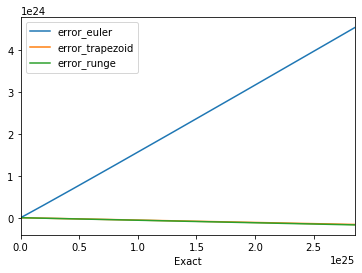

In [0]:
ti = 0
tf = 30
tn = 10000
t = np.linspace(ti, tf, tn)

df_euler = euler(yi, t, t[1]-t[0])
df_trape = trapezoid(yi, t, t[1]-t[0])
df_runge = runge(yi, t, t[1]-t[0])
df_exact = (1/4*np.exp(2*t)+3/2*t+3/4)


df = pd.DataFrame([df_euler, df_trape, df_runge, df_exact], index=['Euler', 'Trapezoid', 'Runge', 'Exact']).T

df.plot()

df['error_euler'] = df['Exact']-df['Euler']
df['error_trapezoid'] = df['Exact']-df['Trapezoid']
df['error_runge'] = df['Exact']-df['Runge']

df.plot(x='Exact',y=['error_euler', 'error_trapezoid','error_runge'])

With many steps, it looks like Euler method is fitting well in the exact function, but its error is still higher than the other methods. 

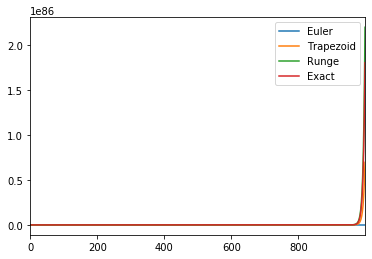

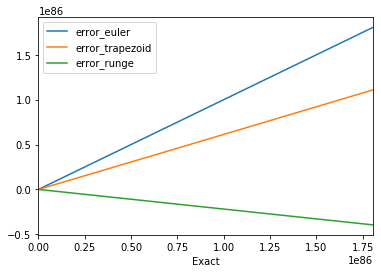

In [0]:
ti = 0
tf = 100
tn = 1000
t = np.linspace(ti, tf, tn)

df_euler = euler(yi, t, t[1]-t[0])
df_trape = trapezoid(yi, t, t[1]-t[0])
df_runge = runge(yi, t, t[1]-t[0])
df_exact = (1/4*np.exp(2*t)+3/2*t+3/4)


df = pd.DataFrame([df_euler, df_trape, df_runge, df_exact], index=['Euler', 'Trapezoid', 'Runge', 'Exact']).T

df.plot()

df['error_euler'] = df['Exact']-df['Euler']
df['error_trapezoid'] = df['Exact']-df['Trapezoid']
df['error_runge'] = df['Exact']-df['Runge']

df.plot(x='Exact',y=['error_euler', 'error_trapezoid','error_runge'])

As I increase the step and period, Runge method shows its efficiency and lower error rate. 